**Predict Student exam score**

> This project for my family bussiness, Tutorial School



---

**Objective:** In this project, I would like to access student performance using data from UCI Machine Learning, Student Alcohol Consumption to ***build model Regression for predictive student performance*** and guide for data collection  to develop into business strategy in the future: The first School. that can predict the student's performance.


---



# **The DDBM-Innovation Blueprint**

Ref: Brownlow, J., Mohamed, Z., Neely, A., Urmetzer, Florian. (2015). Data-Driven Business 
Models: A Blueprint for Innovation. doi:10.13140/RG.2.1.2233.2320

The DDBM-Innovation Blueprint is a model that identifies, the transformation of a generic business to a data-driven business for gathering the *Consumer Insight* that should answer the following questions.



1.   **Target Outcome:** What are we trying to 
achieve?
2.    **Offering:** 
What is our 
desired offering?
3. **Data Source:**
What data do we 
require and where 
are we going to 
acquire it from?
4. **Key 
Activities:** How 
are we going to 
utilize this 
data?
5. **Revenue 
Model:**
How will we 
monetize it?
6.**Inhibitors:**
What are the 
barriers to us 
accomplishing 
our goal?




`Example`
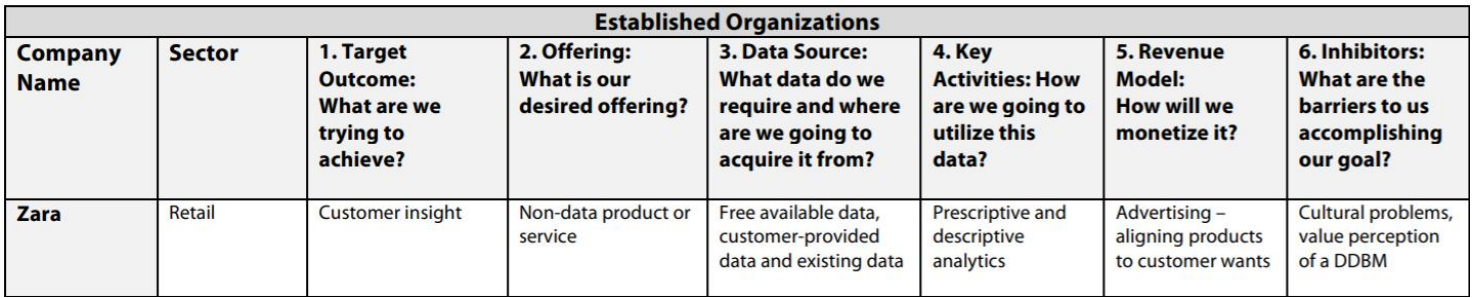


**DDBM-Innovation Blueprint  of This project**

*At the present company doesn’t have data enough so we use freely available data* 

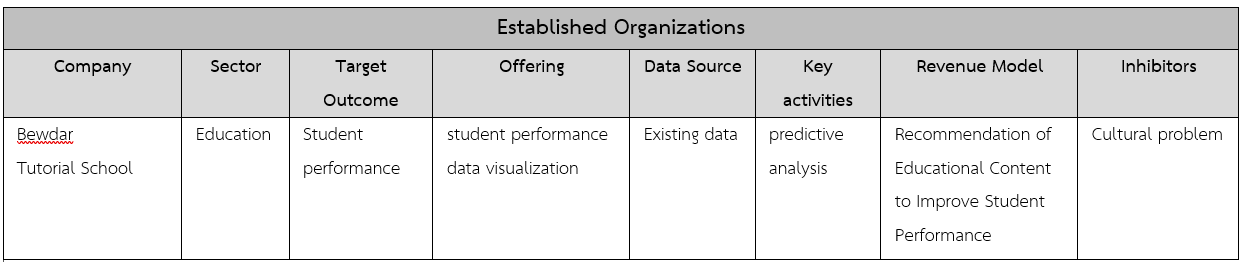



**table of content**
*   1.import data
*   2.data cleaning
*   3.Feature Selection with Data visualization
*   4.data preprocessing
*   5.model implementation
*   6.conclusion

***Data:*** https://www.kaggle.com/uciml/student-alcohol-consumption

***Ref:*** https://www.kaggle.com/gcdatkin/predicting-student-grades

**1.IMPORTING LIBRARIES AND LOADING DATA**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv("/content/drive/MyDrive/Pleum Love Data/Predict Student Score Exam/student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10




---



**2.DATA CLEARNING**

In [11]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

*All Data are clean..*

**3. FEATURE SELECTION WITH DATA VISUALIZATION**

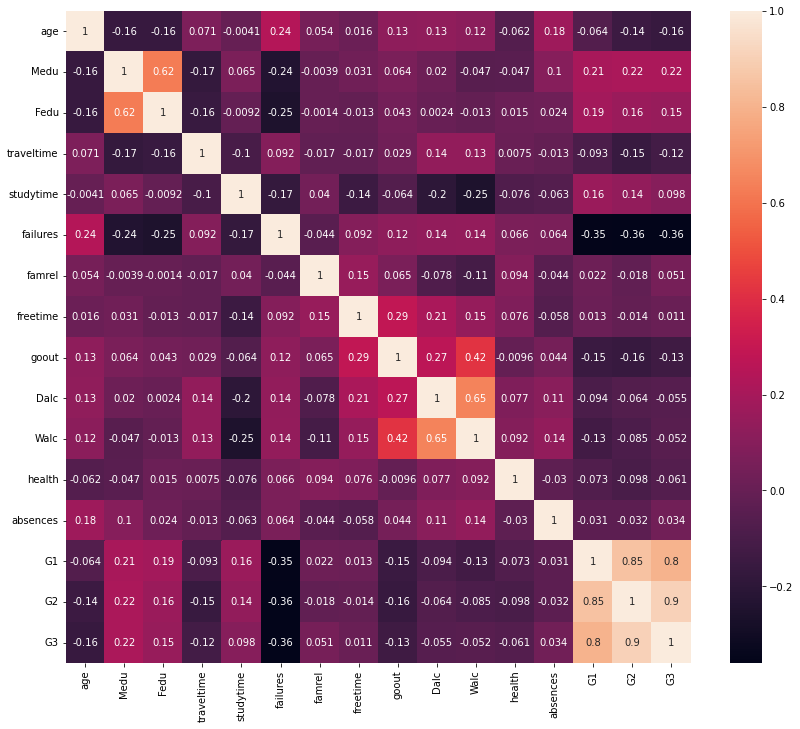

In [ ]:
#Correation
corr = data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot = True)
plt.show()

จาก Heatmap จะนำตัวแปรทั้งหมดยกเว้น G3 ซึ่งเป็น final score เข้าไปทำนายผล
คะแนนสอบครั้งสุดท้าย = ตัวแปรทั้งหมด...

from Heatmap, we select G3 to dependent variable and other feature to independent variable

**4.DATA PREPROCESSING**

In [14]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

เปลี่ยนตัวแปรทั้งหมดให้เป็นจำนวนเต็ม

In [15]:
# Ref : https://www.geeksforgeeks.org/enumerate-in-python/
# Print column in data where variable is object
object_col = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
object_col 

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
# Python print f-string 
# Ref: https://www.datacamp.com/community/tutorials/f-string-formatting-in-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377092&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9047122&gclid=Cj0KCQjwqp-LBhDQARIsAO0a6aLw_ExR5cWZ3hlkKAHolmz4pmaORP03XT3Fk53CM-fjUVhdaKDCPd4aAtZzEALw_wcB
for column in object_col:
  print(f"{column} : {data[column].unique()}")

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


จาก object สามารถเปลี่ยนข้อมูลให้เป็น 0 หรือ 1 ได้ ยกเว้น Mjob, Fjob, reason, guardian ที่มีมากกว่า 2 ค่าดังนั้นต้อง dummy ข้อมูลขึ้นมาใหม่

In [17]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [18]:
var = ['Mjob','Fjob','reason','guardian']

for aim in var :
  data[aim] = data[aim].apply(lambda x : aim + "_dummy_" + x)

In [19]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,Mjob_dummy_at_home,Fjob_dummy_teacher,reason_dummy_course,guardian_dummy_mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,Mjob_dummy_at_home,Fjob_dummy_other,reason_dummy_course,guardian_dummy_father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,Mjob_dummy_at_home,Fjob_dummy_other,reason_dummy_other,guardian_dummy_mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,Mjob_dummy_health,Fjob_dummy_services,reason_dummy_home,guardian_dummy_mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_home,guardian_dummy_father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,Mjob_dummy_services,Fjob_dummy_other,reason_dummy_reputation,guardian_dummy_mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_home,guardian_dummy_mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,Mjob_dummy_other,Fjob_dummy_teacher,reason_dummy_home,guardian_dummy_mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,Mjob_dummy_services,Fjob_dummy_other,reason_dummy_home,guardian_dummy_mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_home,guardian_dummy_mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [20]:
# Python combining DataFrames
# Ref: https://realpython.com/pandas-merge-join-and-concat/
data_dummy = pd.concat([pd.get_dummies(data['Mjob']),
                     pd.get_dummies(data['Fjob']),
                     pd.get_dummies(data['reason']),
                     pd.get_dummies(data['guardian'])],
                     axis=1)

data_dummy

,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [21]:
# Join dummay and data
data = pd.concat([data, data_dummy], axis=1)

# Don't forget drop data that change to data_dummy
data.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [22]:
# Check object again
object_col = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
object_col 

for column in object_col:
  print(f"{column} : {data[column].unique()}")

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


In [23]:
# Python Encoding
# Ref : https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

for column in object_col:
  data[column] = LabelEncoder().fit_transform(data[column])

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [24]:
# Check object again
object_col = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
object_col 

[]

In [25]:
data.dtypes

school                     int64
sex                        int64
age                        int64
address                    int64
famsize                    int64
Pstatus                    int64
Medu                       int64
Fedu                       int64
traveltime                 int64
studytime                  int64
failures                   int64
schoolsup                  int64
famsup                     int64
paid                       int64
activities                 int64
nursery                    int64
higher                     int64
internet                   int64
romantic                   int64
famrel                     int64
freetime                   int64
goout                      int64
Dalc                       int64
Walc                       int64
health                     int64
absences                   int64
G1                         int64
G2                         int64
G3                         int64
Mjob_dummy_at_home         uint8
Mjob_dummy

In [26]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,0,1,16,1,1,1,4,3,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
6,0,1,16,1,1,1,2,2,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0,0,17,1,0,0,4,4,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,0,1,15,1,1,0,3,2,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9,0,1,15,1,0,1,3,4,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


**5. MODEL IMPLEMENTATION REGRESSION**


to analysis final Score



```
y = a + B1X1 + B2X2 + ... +BnXn 
```



In [27]:
y = data['G3']
x = data.drop('G3', axis = 1)

In [28]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


Ref: https://phyblas.hinaboshi.com/20161124
ต้อง Scalling ตัวแปรอิสระของ X

In [29]:
x = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)

In [30]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_dummy_at_home,Mjob_dummy_health,Mjob_dummy_other,Mjob_dummy_services,Mjob_dummy_teacher,Fjob_dummy_at_home,Fjob_dummy_health,Fjob_dummy_other,Fjob_dummy_services,Fjob_dummy_teacher,reason_dummy_course,reason_dummy_home,reason_dummy_other,reason_dummy_reputation,guardian_dummy_father,guardian_dummy_mother,guardian_dummy_other
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,-0.419041,3.258473,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,-2.938392,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-0.385040,-1.257656,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
392,2.754443,1.054656,3.377047,-1.867789,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,-0.385040,-1.257656,-0.919671,-1.017881,-1.968894,0.23094,-2.232677,-0.708450,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(276, 45)
(276,)
(119, 45)
(119,)


In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
# x_test that data use to predict
print(x_test)

       school       sex  ...  guardian_dummy_mother  guardian_dummy_other
151 -0.363050  1.054656  ...               0.668496             -0.296908
213 -0.363050  1.054656  ...               0.668496             -0.296908
326 -0.363050  1.054656  ...               0.668496             -0.296908
129 -0.363050  1.054656  ...               0.668496             -0.296908
232 -0.363050  1.054656  ...               0.668496             -0.296908
..        ...       ...  ...                    ...                   ...
92  -0.363050 -0.948176  ...              -1.495896             -0.296908
254 -0.363050  1.054656  ...               0.668496             -0.296908
40  -0.363050 -0.948176  ...               0.668496             -0.296908
349  2.754443  1.054656  ...               0.668496             -0.296908
228 -0.363050  1.054656  ...               0.668496             -0.296908

[119 rows x 45 columns]


In [34]:
# Predict
score_G3 = model.predict(x_test)
print(score_G3)

[12.69177266  5.6434023  15.87207051 19.6730959   9.8277895   6.77868672
 17.84613057  4.70275898 10.05499287  6.47854634  7.89770527  8.76608296
 11.89227314  9.84417744  9.978821    9.04330464  4.30831929  7.08816548
 12.785248    6.07897969  5.52594014 13.96374531  3.65786763 11.55566426
 20.43637105 18.95928975 11.82086201 16.11172505  6.59808369 16.94555684
 19.04467793 12.07434102 10.86660786  9.11038228 16.6887209   7.62603779
 11.92169209  9.90863057 18.06121846  8.40026875  9.48095723  1.71447773
  7.20803853  7.9967043   8.83361836  8.20153828 18.15716572 16.89523335
  8.13909932 19.58923359 14.6401064  14.49819966  4.80902119  9.78259297
  8.84094258 13.74575825 14.29876729  7.66391011 13.76593037 11.60040303
 11.07193013 10.71240254 18.2607729  10.23269673 12.5854189   6.95617695
  9.8316042   4.6954958  12.79266377 14.61035176  8.55841084 13.03353901
  8.99780293  5.16290303 15.62158223 10.97821064 19.16540547  8.27139302
  9.32739277 10.97576924  8.51364155 11.01718159 10

***Performance Result***

In [35]:
print("R-square for train set : %.4f" % model.score(x_test,y_test))

R-square for train set : 0.8031


**Ploting**



---ไม่เกี่ยวแล้ว



**Test Model if We have Student like:**
*   school 'GP' 
*   sex 'M'
*   age '21'
*   address 'U'
*   famsize 'LE3'
*   Pstatus 'A'
*   Medu '0'
*   Fedu '0'
*   Mjob 'other'
*   Fjob 'other'
*   reason 'course'
*   guardian 'mother'
*   traveltime '3'
*   studytime '4'
*   failures '0'
*   schoolsup 'yes'
*   famsup 'no'
*   paid 'no'
*   activities 'yes'
*   nursery 'no'
*   higher 'yes'
*   internet 'yes'
*   romantic 'yes'
*   famrel '1'
*   freetime '3'
*   goout '3'
*   Dalc '1'
*   Walc '3'
*   health '4'
*   absences '0'
*   G1 '14'
*   G2 '17'
*   G3 'output target' so dummy 0 for first





























In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/Project/Predict Student Score/test_model_with_one_student.csv")
sample

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,21,U,LE3,A,0,0,other,other,course,mother,3,4,0,yes,no,no,yes,no,yes,yes,yes,1,3,3,1,3,4,0,14,17,NaN


In [ ]:
sample.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            1
dtype: int64

In [ ]:
sample = sample.drop('G3', axis = 1)

In [ ]:
sample

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,M,21,U,LE3,A,0,0,other,other,course,mother,3,4,0,yes,no,no,yes,no,yes,yes,yes,1,3,3,1,3,4,0,14,17


In [ ]:
var = ['Mjob','Fjob','reason','guardian']

for aim in var :
  sample[aim] = sample[aim].apply(lambda x : aim + "_dummy_" + x)

In [ ]:
sample

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,M,21,U,LE3,A,0,0,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_course,guardian_dummy_mother,3,4,0,yes,no,no,yes,no,yes,yes,yes,1,3,3,1,3,4,0,14,17


In [ ]:
sample_dummy = pd.concat([pd.get_dummies(sample['Mjob']),
                     pd.get_dummies(sample['Fjob']),
                     pd.get_dummies(sample['reason']),
                     pd.get_dummies(sample['guardian'])],
                     axis=1)

sample_dummy

,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_course,guardian_dummy_mother
0,1,1,1,1


In [ ]:
# Join dummay and data
sample = pd.concat([sample, sample_dummy], axis=1)

# Don't forget drop data that change to data_dummy
sample.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

sample

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_course,guardian_dummy_mother
0,GP,M,21,U,LE3,A,0,0,3,4,0,yes,no,no,yes,no,yes,yes,yes,1,3,3,1,3,4,0,14,17,1,1,1,1


In [ ]:
object_sample_col = [sample.columns[index] for index, dtype in enumerate(sample.dtypes) if dtype == 'object']
object_sample_col 

for column in object_sample_col :
  sample[column] = LabelEncoder().fit_transform(sample[column])

sample

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_dummy_other,Fjob_dummy_other,reason_dummy_course,guardian_dummy_mother
0,0,0,21,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,0,1,3,3,1,3,4,0,14,17,1,1,1,1


In [ ]:
result_sample = model.predict(sample)
print(result_sample)